## Drawing Edgeworth Box

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [103]:
def Edgeworth_box(u1, u2, util1, util2, MRS1, MRS2, ttl, ttl_margin= 1, top=0.7,  fname=None):
    l1 = 0.00000001
    x1 = np.arange(l1, u1, 0.01)
    x2 = np.arange(l1, u2, 0.01)
    X1, X2 = np.meshgrid(x1, x2)

    V1 = util1(X1, X2)
    V2 = util2(u1-X1, u2-X2)
    
    x, y = contract_curve(u1,u2, MRS1,MRS2,num_indiff = 10)
    xr = u1-x[::-1] # to use the same contours for Consumer 2.
    yr = u2-y[::-1] # to use the same contours for Consumer 2.
    clev1 = util1(x,y)
    clev2 = util2(xr, yr)

    Draw_Edgeworth_box(u1, u2, X1, X2, V1, V2, clev1,clev2, ttl, ttl_margin, top,contract1=x, contract2=y)
    if fname != None:
        plt.savefig(fname)

In [33]:
from scipy.optimize import fsolve
from scipy.optimize import fminbound

def contract_curve(u1, u2, MRS1, MRS2, num_indiff = 10):
    xs = np.linspace(0,u1,num_indiff+2)
    xs = xs[1:-1]
    ys = []
    for x in xs:
        y = fminbound(lambda y: (MRS1(x,y) - MRS2(u1-x, u2-y))**2, 0, u2)
        ys.append(min(max(np.asscalar(y),0),u2))
    ys = np.asarray(ys)
    return xs, ys

In [126]:
def Draw_Edgeworth_box(u1, u2,X1, X2, V1, V2, clev1,clev2, ttl=[], ttl_margin= 1, top=0.7,contract1=[], contract2=[]):
    # u1: the total amount of good 1
    # u2: the total amount of good 2
    # V1: levels of utility for consumer 1
    # V2: levels of utility for consumer 2
    # clev1: levels of contours (for consumer 1) you are interested in
    # clev2: levels of contours (for consumer 2) you are interested in
    # ttl: a title
    # ttl_margin: space added for the title
    # top: a location where the graph starts (if top=1, the title and the graph will overlap)
    xtcks = np.arange(0, u1+1)
    ytcks = np.arange(0,u2+1)

    # Adjustment of the title is bit annoying when we try to set xlabel on the top
    if len(ttl)>0:
        fig = plt.figure(figsize = (u1, u2/top))
        ax1 = fig.add_subplot(1,1,1)
        plt.subplots_adjust(top=top)
        fig.suptitle(ttl)
        #plt.title(ttl)
    else:
        fig = plt.figure(figsize = (u1, u2))

    col1 = 'tab:red'
    col2 = 'tab:blue'
 
    plt.contour(X1, X2, V1,clev1,  linewidths = 1, colors=col1, linestyles = 'dashed')
    plt.contour(X1, X2, V2,clev2,  linewidths = 1, colors = col2, linestyles = 'dashed')
    plt.xlim([0,u1])
    plt.ylim([0,u2])
    plt.xlabel('$x_{1,1}$', color = col1, fontsize = 13)
    plt.ylabel('$x_{1,2}$', color = col1, fontsize = 13)
    plt.xticks(xtcks, color = col1)
    plt.yticks(ytcks, color = col1)
    xplt = np.linspace(0,u1,12)
    yplt = np.linspace(0,u2,12)
    if len(contract1)>0:
        xplt[1:-1]=contract1
        yplt[1:-1]=contract2
        plt.plot(xplt,yplt, 'k--', alpha = 0.7)


    ax1 = plt.gca()
    ax2 = plt.twinx(ax1)
    plt.ylabel('$x_{2,2}$', color=col2 , fontsize = 13)
    plt.yticks(ytcks,ytcks[::-1], color = col2)

    # It's a bit hacky, but the following looks an easy way. 
    ax3 = plt.twiny(ax1)
    plt.xlabel('$x_{2,1}$', color=col2, fontsize = 13)
    plt.xticks(xtcks,xtcks[::-1], color = col2)

    return fig

### Edgeworth Box under Homothetic Preferences
- ##### Q: Is a contract curve of homothetic preferences always a diagonal line of the Edgeworth Box ?
- ##### A: If preferences are identical and strictly convex (i.e., strictly (quasi-) concave utility functions), Yes

##### Example with CES
(with the same weights on two goods. )

In [4]:
def CES(x,y,dlt):
    return (x**dlt)/dlt + (y**dlt)/dlt
def Cobb_Douglas(x, y, al, bet):
    return (x**al)*(y**bet)

def MRS_CES(x,y,dlt):
    return (x**(dlt-1))/(y**(dlt-1))
def MRS_CD(x, y, al, bet):
    return (al*y)/(bet*x)

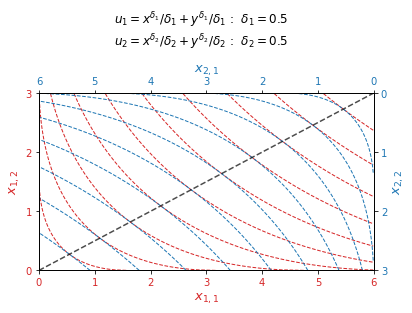

In [162]:
dlt1 = 0.5
dlt2 = dlt1
Edgeworth_box(u1=6, u2=3,
              util1 = lambda x,y: CES(x, y, dlt1),
              util2 =lambda x,y: CES(x, y, dlt2), 
              MRS1 =lambda x, y: MRS_CES(x,y,dlt1),
              MRS2 =lambda x, y: MRS_CES(x,y,dlt2),
              ttl='$u_1=x^{\delta_1}/{\delta_1} + y^{\delta_1}/{\delta_1}$ :  ${\delta_1}=$' + '{}\n'.format(dlt1)
              +'$u_2=x^{\delta_2}/\delta_2 + y^{\delta_2}/\delta_2$ :  ${\delta_2}=$' + '{}\n'.format(dlt2),
              ttl_margin= 1, top=0.7,  fname='Edgeworth_identical1.png')

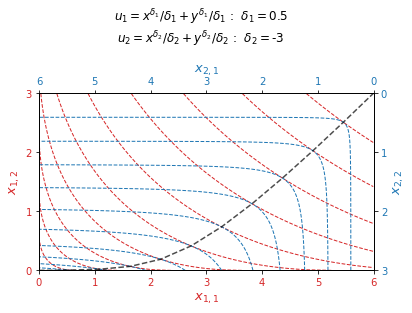

In [198]:
dlt1 = 0.5
dlt2 = -3
Edgeworth_box(u1=6, u2=3,
              util1 = lambda x,y: CES(x, y, dlt1),
              util2 =lambda x,y: CES(x, y, dlt2), 
              MRS1 =lambda x, y: MRS_CES(x,y,dlt1),
              MRS2 =lambda x, y: MRS_CES(x,y,dlt2),
              ttl='$u_1=x^{\delta_1}/{\delta_1} + y^{\delta_1}/{\delta_1}$ :  ${\delta_1}=$' + '{}\n'.format(dlt1)
              +'$u_2=x^{\delta_2}/\delta_2 + y^{\delta_2}/\delta_2$ :  ${\delta_2}=$' + '{}'.format(dlt2),
              ttl_margin= 1, top=0.7,  fname='Edgeworth_not_identical1.png')

In the above graph, weights on two goods are the same, but complementarity for each consumer are different. (Consumer 2 feels higher complementaryty than Consumer 1) 

##### Example with Cobb-Douglas
(With different weights for two goods.)

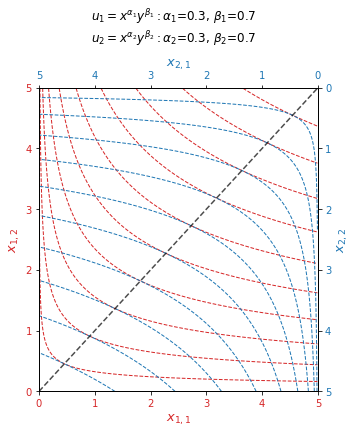

In [182]:
al = 0.3
bet = 0.7
Edgeworth_box(u1=5, u2=5,
              util1 = lambda x,y: Cobb_Douglas(x, y, al,bet),
              util2 =lambda x,y: Cobb_Douglas(x, y, al,bet), 
              MRS1 =lambda x, y: MRS_CD(x,y, al,bet),
              MRS2 =lambda x, y: MRS_CD(x,y, al,bet),
              ttl=r'$u_1=x^{\alpha_1}y^{\beta_1} :  {\alpha_1}$'+ '={}, '.format(al) + r'$\beta_1$'+ '={}\n'.format(bet)
              +r'$u_2=x^{\alpha_2}y^{\beta_2} :  {\alpha_2}$'+ '={}, '.format(al) + r'$\beta_2$'+ '={}'.format(bet),
              ttl_margin= 1, top=0.8,  fname='Edgeworth_identical2.png')

Even if goods 2 is more important, the contract curve is still diagonal since prefernces are identical and homothetic (and strictly convex) 


If we use different weigts for two consumers, then we have a different contract curve.

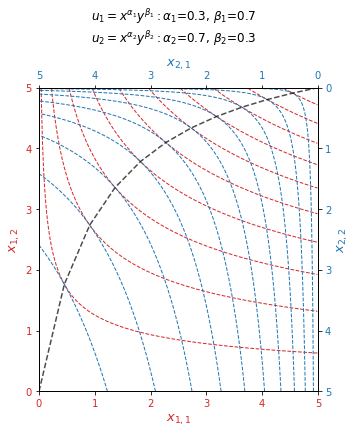

In [197]:
al = 0.3
bet = 0.7
asym = 0.4
Edgeworth_box(u1=5, u2=5,
              util1 = lambda x,y: Cobb_Douglas(x, y, al,bet),
              util2 =lambda x,y: Cobb_Douglas(x, y, al+asym,bet-asym), 
              MRS1 =lambda x, y: MRS_CD(x,y, al,bet),
              MRS2 =lambda x, y: MRS_CD(x,y, al+asym,bet-asym),
              ttl=r'$u_1=x^{\alpha_1}y^{\beta_1} :  {\alpha_1}$'+ '={:02.1f}, '.format(al) + r'$\beta_1$'+ '={:02.1f}\n'.format(bet)
              +r'$u_2=x^{\alpha_2}y^{\beta_2} :  {\alpha_2}$'+ '={:02.1f}, '.format(al+asym) + r'$\beta_2$'+ '={:02.1f}'.format(bet-asym),
              ttl_margin= 1, top=0.8,  fname='Edgeworth_not_identical2.png')